In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_csv('../data/data_cleaned.csv', dtype={'route': str}, low_memory=False)

In [44]:
# Convert 'dt' column to datetime
df['dt'] = pd.to_datetime(df['dt'])

# Basic statistical summary
print(df.describe())

                                  dt          delay            gap  \
count                         143968  143968.000000  143968.000000   
mean   2019-07-31 19:55:59.089797888      13.574218      19.963909   
min              2014-01-02 06:31:00       0.000000       0.000000   
25%              2016-12-08 06:02:15       5.000000      10.000000   
50%              2019-05-16 09:37:30       8.000000      15.000000   
75%              2022-05-01 22:08:15      10.000000      20.000000   
max              2024-09-30 23:35:00    1400.000000    4216.000000   
std                              NaN      32.561074      34.990974   

             vehicle  
count  139302.000000  
mean     4603.694958  
min         0.000000  
25%      4111.000000  
50%      4419.000000  
75%      4545.000000  
max    163242.000000  
std      2192.227912  


In [45]:
# Get unique values from the 'incident' column
print(df['incident'].unique())

['Late Leaving Garage' 'Utilized Off Route' 'Held By' 'Investigation'
 'Mechanical' 'Emergency Services' 'Diversion' 'General Delay'
 'Overhead - Pantograph' 'Security' 'Operations'
 'Collision - TTC Involved' 'Cleaning' 'Overhead' 'Late' 'Rail/Switches'
 'e' 'Late  ' 'Late Entering Service' 'Cleaning - Unsanitary'
 'Cleaning - Disinfection' 'Management']


In [46]:
# Define a mapping for merging the values within the 'incident' column
merge_mapping = {
    'Late Leaving Garage': 'Late',
    'Late': 'Late',
    'e': 'Late',
    'Late  ': 'Late',
    'Late Entering Service': 'Late',
    'Overhead - Pantograph': 'Overhead',
    'Overhead': 'Overhead',
    'Cleaning': 'Cleaning',
    'Cleaning - Unsanitary': 'Cleaning',
    'Cleaning - Disinfection': 'Cleaning'
}

# Apply the mapping to the 'incident' column
df['incident'] = df['incident'].replace(merge_mapping)

# Display unique incidents after merging
print("Unique incidents after merging:")
print(df['incident'].unique())

Unique incidents after merging:
['Late' 'Utilized Off Route' 'Held By' 'Investigation' 'Mechanical'
 'Emergency Services' 'Diversion' 'General Delay' 'Overhead' 'Security'
 'Operations' 'Collision - TTC Involved' 'Cleaning' 'Rail/Switches'
 'Management']


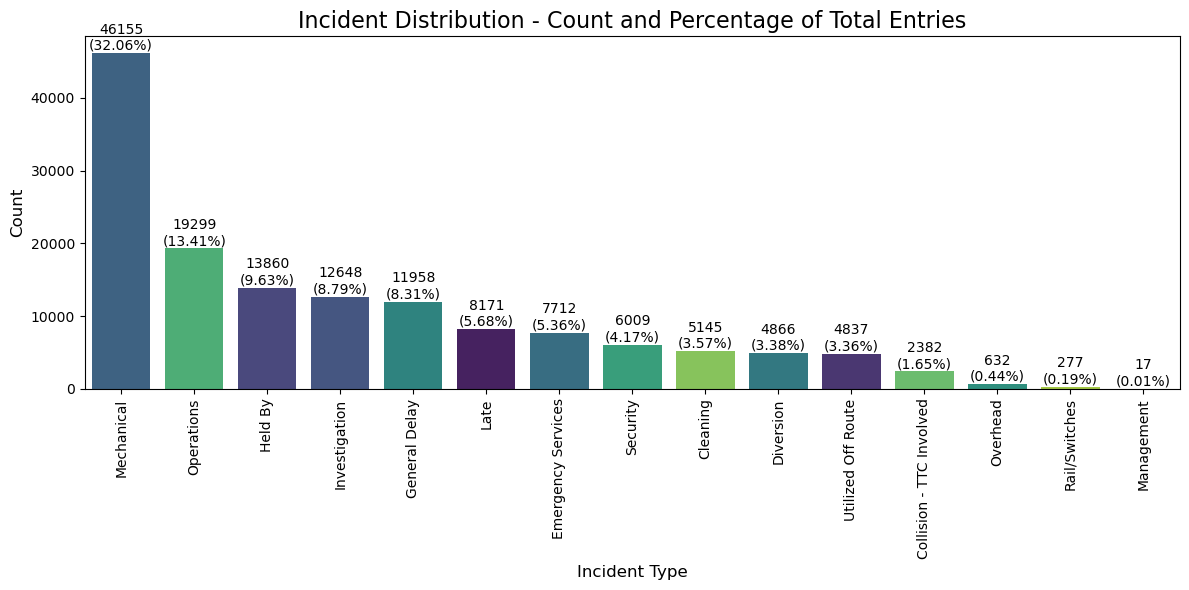

In [48]:
# Get the total number of entries in the dataset (RangeIndex size)
total_entries = len(df)

# Sort incidents by frequency
incident_order = df['incident'].value_counts().index

# Calculate the count and percentage for each incident type
incident_counts = df['incident'].value_counts()
incident_percentages = (incident_counts / total_entries) * 100

# Plot for distribution of incidents (Count)
plt.figure(figsize=(12, 6))
ax = sns.countplot(
    data=df, 
    x='incident', 
    order=incident_order,
    hue='incident',  # Assign the 'incident' variable to hue
    palette='viridis'  # Adding color back to the bars
)

# Set labels and title
plt.title('Incident Distribution - Count and Percentage of Total Entries', fontsize=16)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Incident Type', fontsize=12)
plt.xticks(rotation=90)

# Add both count and percentage annotations on bars
for p in ax.patches:
    height = p.get_height()
    incident_type = p.get_x() + p.get_width() / 2.  # Position of the text
    count = int(height)
    percentage = (height / total_entries) * 100
    ax.annotate(
        f'{count}\n({percentage:.2f}%)', 
        (incident_type, height + 50),  # Adjusted to place text above the bar
        ha='center', va='bottom', fontsize=10, color='black'
    )

plt.tight_layout()
plt.show()

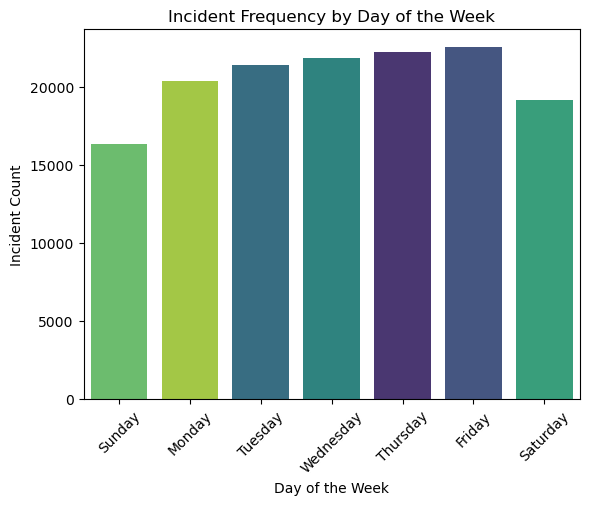

In [49]:
# Incident Frequency by Day of the Week
# Plot incidents count by day of the week
sns.countplot(
    data=df,
    x='day',
    order=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'],
    hue='day',
    palette='viridis',
    dodge=False,
    legend=False
)
plt.title('Incident Frequency by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Incident Count')
plt.xticks(rotation=45)
plt.show()

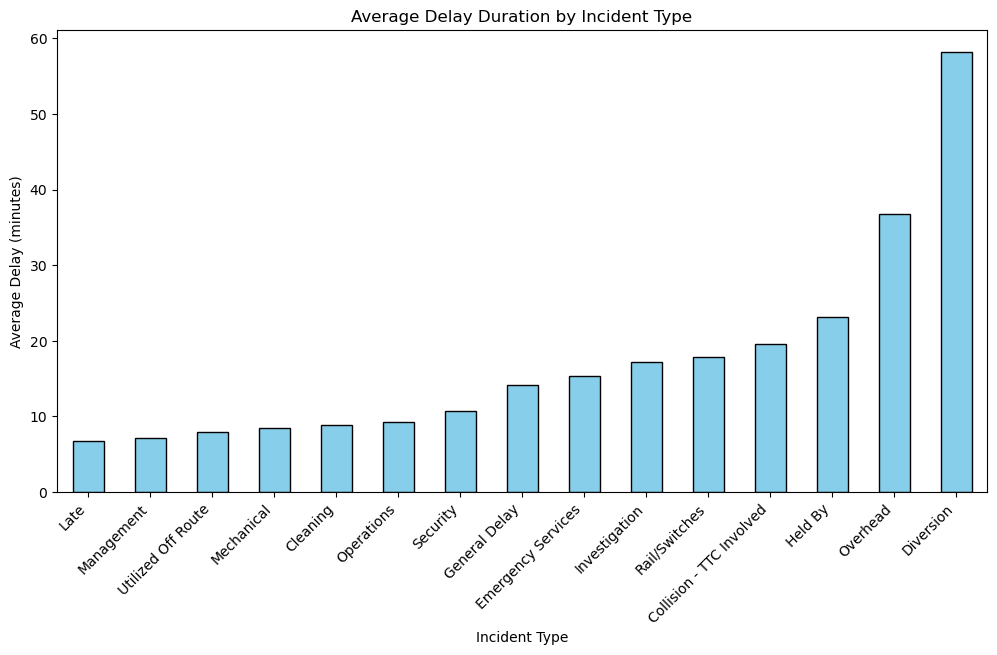

In [50]:
# Average Delay Duration by Incident Type
plt.figure(figsize=(12, 6))
avg_delay = df.groupby('incident')['delay'].mean().sort_values()
avg_delay.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Delay Duration by Incident Type')
plt.ylabel('Average Delay (minutes)')
plt.xlabel('Incident Type')
plt.xticks(rotation=45, ha='right')
plt.show()

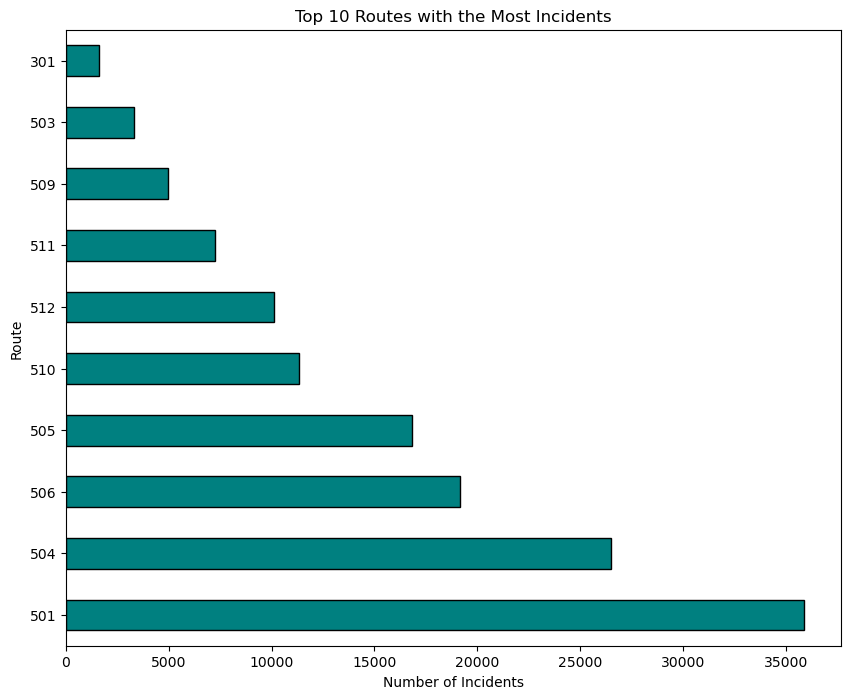

In [51]:
# Incident Distribution by Route
plt.figure(figsize=(10, 8))
route_counts = df['route'].value_counts().head(10)
route_counts.plot(kind='barh', color='teal', edgecolor='black')
plt.title('Top 10 Routes with the Most Incidents')
plt.xlabel('Number of Incidents')
plt.ylabel('Route')
plt.show()

<Figure size 1200x800 with 0 Axes>

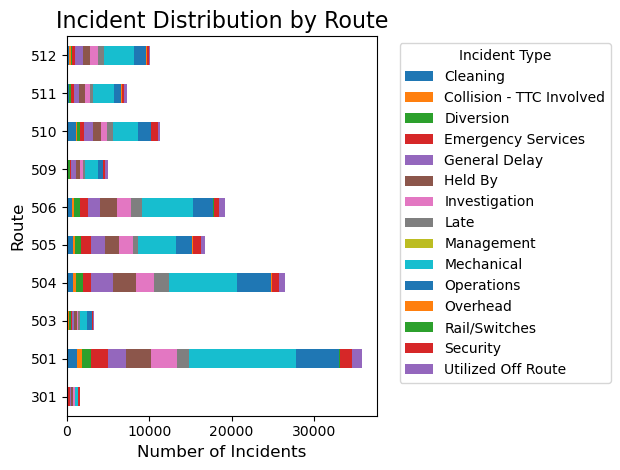

In [52]:
# Get the top 10 routes with the most incidents
top_routes = df['route'].value_counts().head(10).index

# Filter the DataFrame for these top routes
filtered_df = df[df['route'].isin(top_routes)]

# Count incidents by route and incident type
incident_distribution = filtered_df.groupby(['route', 'incident']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(12, 8))
incident_distribution.plot(kind='barh', stacked=True, color=plt.cm.tab10.colors)
plt.title('Incident Distribution by Route', fontsize=16)
plt.xlabel('Number of Incidents', fontsize=12)
plt.ylabel('Route', fontsize=12)
plt.legend(title='Incident Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

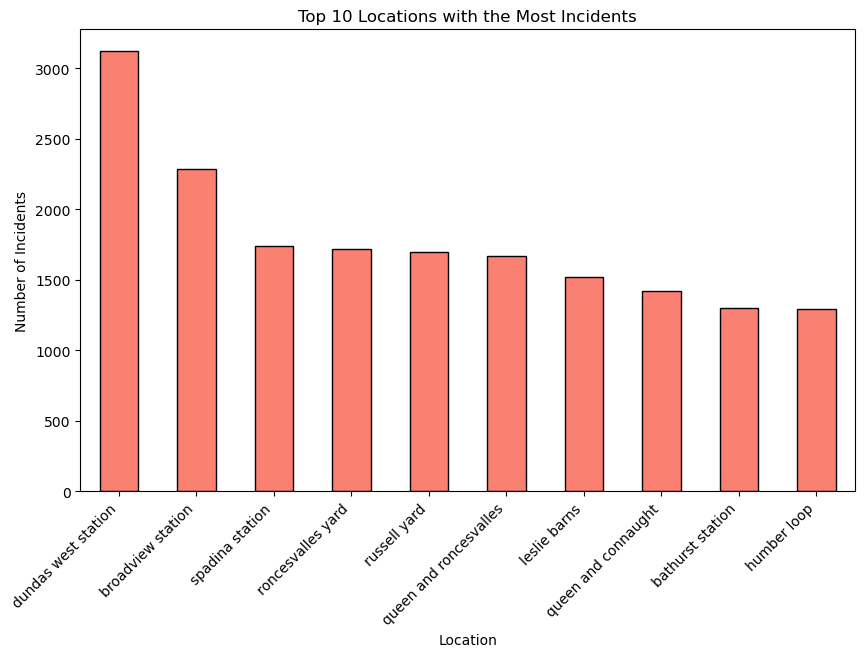

In [53]:
# Top 10 locations for incidents
top_locations = df['location'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_locations.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Top 10 Locations with the Most Incidents')
plt.ylabel('Number of Incidents')
plt.xlabel('Location')
plt.xticks(rotation=45, ha='right')
plt.show()

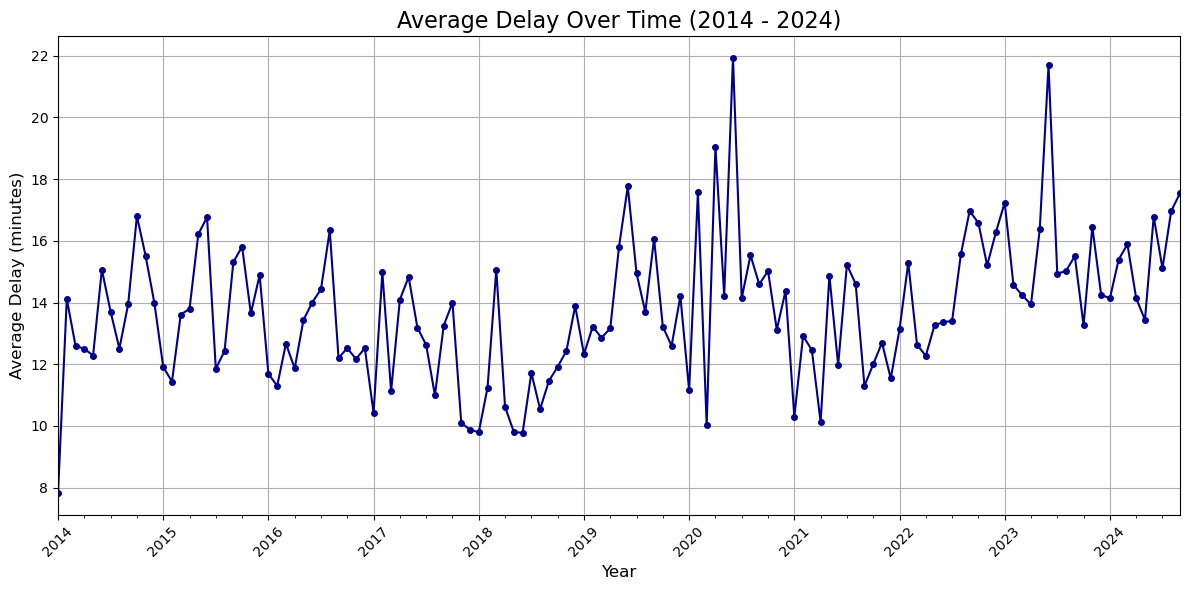


Top 5 Most Common Incidents:
incident
Mechanical       46155
Operations       19299
Held By          13860
Investigation    12648
General Delay    11958
Name: count, dtype: int64


In [54]:
# Delays Over Time (Trend Analysis)
# Convert 'dt' column to datetime and extract year-month
df['dt'] = pd.to_datetime(df['dt'])
df['year_month'] = df['dt'].dt.to_period('M')

# Group by month and calculate mean delay
monthly_delay = df.groupby('year_month')['delay'].mean()

# Plot time series as a line chart
plt.figure(figsize=(12, 6))
monthly_delay.plot(color='darkblue', marker='o', linestyle='-', markersize=4)
plt.title('Average Delay Over Time (2014 - 2024)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Delay (minutes)', fontsize=12)
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# Print summary of top 5 incidents
incident_summary = df['incident'].value_counts().head(5)
print("\nTop 5 Most Common Incidents:")
print(incident_summary)